In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import seaborn as sns
sns.set_context("notebook")
# colors = sns.color_palette("husl",9)
import h5py

# colors = np.asarray([(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]) / 255
# colors = np.asarray([(152, 68, 100), (94, 204, 171), (86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138),(205, 205, 205)]) / 255 
colors = sns.husl_palette(n_colors=9, h=0.01, s=0.9, l=0.65, as_cmap=False)
font = {'size'   : 14}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
# import h5 data named nlpse_data.h5
with h5py.File('nlpse_data/nlpse_data.h5', 'r') as hf:
    # get all variables from data file 
    Rnlpse = hf['R'][:]
    y = hf['y'][:]
    x = hf['x'][:]
    u = hf['u'][:]
    v = hf['v'][:]
    w = hf['w'][:]
    p = hf['p'][:]
    U = hf['U'][:]
    Uy = hf['Uy'][:]
    V = hf['V'][:]
    alpha_01 = hf['alpha/alpha_01'][:]
    alpha_02 = hf['alpha/alpha_02'][:]

nx = Rnlpse.size

print(f"Num stations collected so far = {Rnlpse.size}\n")
print(f"Number of grid points used in the wall normal direction = {u.shape[-1]}\n")

Num stations collected so far = 173

Number of grid points used in the wall normal direction = 100



In [3]:
# folder = 'lst_data_omega_0.026412_beta_0.14071632/'

# alphas = np.load(folder + 'alphas.npy')
# modes = np.load(folder + 'modes.npy')

# # find alpha nearest to target value 
# target_alpha = (0.06409493481281106+0.0037728480748879124j)
# alpha_idx = np.argmin(np.abs(alphas - target_alpha))

# plt.figure(figsize=(6,3), dpi=200)
# plt.plot(np.real(alphas), np.imag(alphas), 'o', color=colors[0], label='alpha')
# plt.plot(np.real(alphas[alpha_idx]), np.imag(alphas[alpha_idx]), 'o', color=colors[1], label='target alpha')
# plt.xlim([0,0.2])
# plt.ylim([-0.1,0.2])

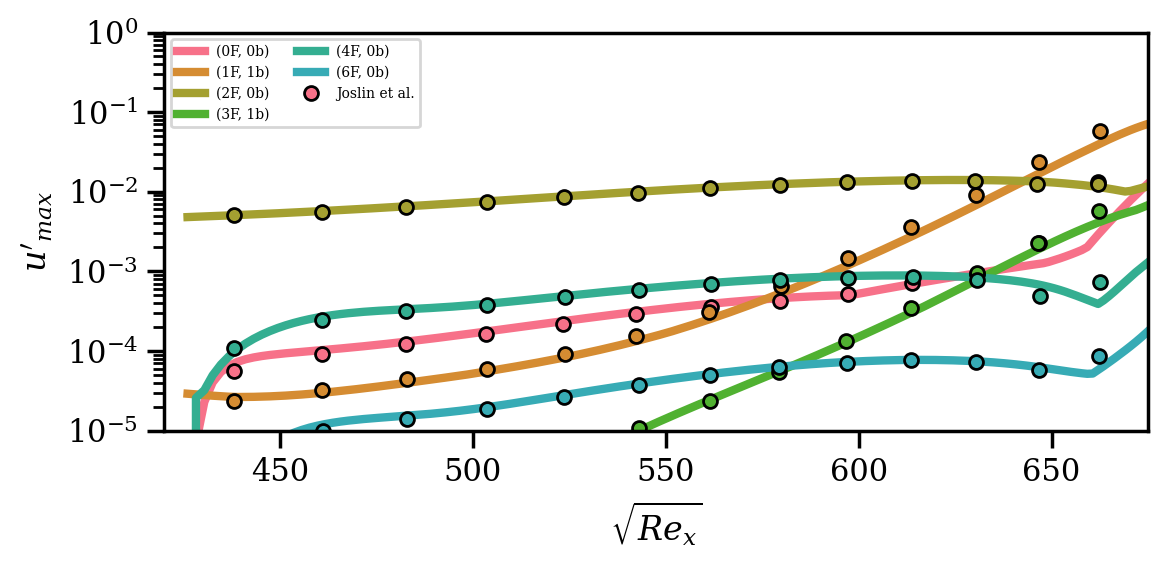

In [4]:
ms = 5
lw = 3
# mew = 2

jos_20 = np.genfromtxt('ref_data/u_20.csv',delimiter=',')
jos_00 = np.genfromtxt('ref_data/u_00.csv',delimiter=',')
jos_11 = np.genfromtxt('ref_data/u_11.csv',delimiter=',')
jos_40 = np.genfromtxt('ref_data/u_40.csv',delimiter=',')
jos_31 = np.genfromtxt('ref_data/u_31.csv',delimiter=',')
jos_60 = np.genfromtxt('ref_data/u_60.csv',delimiter=',')

jos_31[10,0] = 1139.051094890511
jos_31[10,1] = 0.005689373646043358

jos_00[12,0] = 1138.6861313868612
jos_00[12,1] = 0.013398982601914246


umax = np.max(np.abs(u), axis=3)

# u_11_init = umax[1,1,0]
# print(f"u_11 max at the inlet = {u_11_init}")
# # set normalization to match Sleeman 
# this is actually just the definition of RMS amplitude
# the codes sets the RMS amplitude i.e. A_(2,0) / sqrt(2)
# we want to plot the actual amplitude

for m in range(umax.shape[0]):
    for n in range(umax.shape[1]):
        if m == 0 and n == 0:
            umax[m,n,:] *= 1
        elif m != 0 and n == 0:
            umax[m,n,:] *= np.sqrt(2)
        elif m == 0 and n != 0:
            umax[m,n,:] *= np.sqrt(2)
        else:
            umax[m,n,:] *= 2 * np.sqrt(2) 

plt.figure(figsize=(6,3),dpi=200)
plt.semilogy(Rnlpse, umax[0,0,:nx],linewidth=lw,color=colors[0], label=f'({0}F, {0}b)')
plt.semilogy(Rnlpse, umax[1,1,:nx],linewidth=lw, color=colors[1], label=f'({1}F, {1}b)')
plt.semilogy(Rnlpse, umax[2,0,:nx],linewidth=lw, color=colors[2], label=f'({2}F, {0}b)')
plt.semilogy(Rnlpse, umax[3,1,:nx],linewidth=lw, color=colors[3], label=f'({3}F, {1}b)')
plt.semilogy(Rnlpse, umax[4,0,:nx],linewidth=lw, color=colors[4], label=f'({4}F, {0}b)')
plt.semilogy(Rnlpse, umax[6,0,:nx],linewidth=lw, color=colors[5], label=f'({6}F, {0}b)')

plt.semilogy(jos_00[:,0] / 1.72, jos_00[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[0],label='Joslin et al.')
plt.semilogy(jos_11[:,0] / 1.72, jos_11[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[1])
plt.semilogy(jos_20[:,0] / 1.72, jos_20[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[2])
plt.semilogy(jos_31[:,0] / 1.72, jos_31[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[3])
plt.semilogy(jos_40[:,0] / 1.72, jos_40[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[4])
plt.semilogy(jos_60[:,0] / 1.72, jos_60[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[5])

plt.legend(prop={'size': 5}, ncols=2, loc='upper left')
plt.xlabel(r'$\sqrt{Re_x}$')
plt.ylabel(r"$u'_{max}$")
plt.ylim([1e-5, 1e0])
plt.xlim([420, 675])
# plt.title('Subharmonic breakdown')
plt.tight_layout()
plt.show()

In [5]:
# Want to compute the shear stress

nu = 1/426.
# tau_w = du/dy (y = 0)

urms = np.abs(np.copy(u))

# for m in range(umax.shape[0]):
#     for n in range(umax.shape[1]):
#         if m == 0 and n == 0:
#             urms[m,n,:,:] *= 1
#         elif m != 0 and n == 0:
#             urms[m,n,:,:] *= np.sqrt(2)
#         elif m == 0 and n != 0:
#             urms[m,n,:,:] *= np.sqrt(2)
#         else:
#             urms[m,n,:,:] *= 2 * np.sqrt(2) 
            

def compute_tauw(u,y,mu):
    return mu * (u[:,1] - u[:,0]) / (y[1] - y[0])

tau_00 = compute_tauw(urms[0,0,:,:],y, nu)
tau_20 = compute_tauw(urms[2,0,:,:],y, nu)
tau_11 = compute_tauw(urms[1,1,:,:],y, nu )
tau_lam = compute_tauw(U.T, y, nu)

# want to compare to laminar blasius stress
# cf correlation is 0.664 / Rnlpse
# cf = tau_w * 2
blasius_correlation = 0.664 / Rnlpse /2

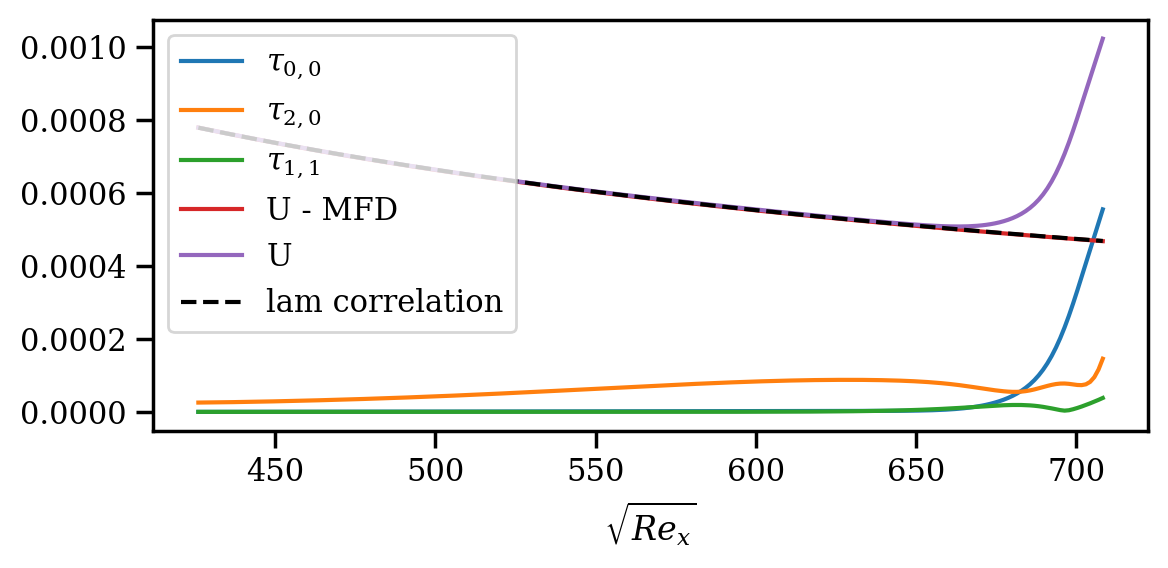

In [9]:
plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse, tau_00,label=r'$\tau_{0,0}$')
plt.plot(Rnlpse, tau_20,label=r'$\tau_{2,0}$')
plt.plot(Rnlpse, tau_11,label=r'$\tau_{1,1}$')
plt.plot(Rnlpse,tau_lam-tau_00,label='U - MFD')
plt.plot(Rnlpse,tau_lam,label='U')

plt.plot(Rnlpse,blasius_correlation,'--k',label='lam correlation')
plt.legend()
plt.xlabel(r'$\sqrt{Re_x}$')
plt.tight_layout()

# save stress profile 
# np.save('nlpse_tau.npy',tau_lam)
# np.save('nlpse_R.npy',Rnlpse)

In [11]:
# write stress data for PSE boundary condition 

x = Rnlpse**2 * nu
y = np.zeros((x.size))
pse_tau_w = tau_lam 

data = np.column_stack((x,y,pse_tau_w))

# Save with space delimiter, no header (since C++ code doesn't expect one)
np.savetxt('pse_stress.prof', data, delimiter=' ')

In [7]:
Rmatch = 5.0 * 10**5
idx = np.where(Rnlpse**2 >= Rmatch)[0][0]

print(f"root(Re_x) = {Rnlpse[idx]} at the matching location")

root(Re_x) = 708.2646343080178 at the matching location


In [8]:
u_sim = np.copy(u)
v_sim = np.copy(v)
w_sim = np.copy(w)
y_sim = np.copy(y)
# U is oriented the opposite way as everything else cause i suck 
U_sim = np.copy(U.T)
V_sim = np.copy(V.T)

# for m in range(umax.shape[0]):
#     for n in range(umax.shape[1]):
#         if m == 0 and n == 0:
#             u_sim[m,n,:,:] *= 1
#         elif m != 0 and n == 0:
#             u_sim[m,n,:,:] *= np.sqrt(2)
#         elif m == 0 and n != 0:
#             u_sim[m,n,:,:] *= np.sqrt(2)
#         else:
#             u_sim[m,n,:,:] *= 2 * np.sqrt(2)

ubl = np.copy(U_sim[idx,:])
vbl = np.copy(V_sim[idx,:])

u_ts = np.copy(u_sim[2,0,idx,:])
v_ts = np.copy(v_sim[2,0,idx,:])
w_ts = np.copy(w_sim[2,0,idx,:])

u_sh = np.copy(u_sim[1,1,idx,:])
v_sh = np.copy(v_sim[1,1,idx,:])
w_sh = np.copy(w_sim[1,1,idx,:])

u_h1 = np.copy(u_sim[3,1,idx,:])
v_h1 = np.copy(v_sim[3,1,idx,:])
w_h1 = np.copy(w_sim[3,1,idx,:])

u_h2 = np.copy(u_sim[4,0,idx,:])
v_h2 = np.copy(v_sim[4,0,idx,:])
w_h2 = np.copy(w_sim[4,0,idx,:])

u_h3 = np.copy(u_sim[6,0,idx,:])
v_h3 = np.copy(v_sim[6,0,idx,:])
w_h3 = np.copy(w_sim[6,0,idx,:])

u_0 = np.copy(u_sim[0,0,idx,:])

y_max = 148 # ymax in the charles simulations
dy = 0.1 # spacing to extend into the freestream in charles

if y_max > y_sim[-1]:
    max_reached = False
    while not max_reached:
        y_sim = np.append(y_sim, y_sim[-1] + dy)
        ubl  = np.append(ubl, ubl[-1])
        vbl  = np.append(vbl, vbl[-1])
        u_ts = np.append(u_ts, u_ts[-1])
        v_ts = np.append(v_ts, v_ts[-1])
        w_ts = np.append(w_ts, w_ts[-1])
        u_sh = np.append(u_sh, u_sh[-1])
        v_sh = np.append(v_sh, v_sh[-1])
        w_sh = np.append(w_sh, w_sh [-1])
        
        u_h1 = np.append(u_h1, u_h1[-1])
        v_h1 = np.append(v_h1, v_h1[-1])
        w_h1 = np.append(w_h1, w_h1 [-1])
        
        u_h2 = np.append(u_h2, u_h2[-1])
        v_h2 = np.append(v_h2, v_h2[-1])
        w_h2 = np.append(w_h2, w_h2 [-1])
        
        u_h3 = np.append(u_h3, u_h3[-1])
        v_h3 = np.append(v_h3, v_h3[-1])
        w_h3 = np.append(w_h3, w_h3 [-1])
        
        u_0 = np.append(u_0, u_0[-1])
        
        if y_sim[-1] >= y_max:
            max_reached = True
            

plt.figure(figsize=(6,3),dpi=200)
plt.plot(ubl, y_sim)
plt.plot(vbl, y_sim)
plt.xlabel(r'$U$')
plt.ylabel(r'$y$')

plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.abs(u_ts), y_sim, label=r'$u$')
plt.plot(np.abs(v_ts), y_sim, label=r'$v$')
plt.plot(np.abs(w_ts), y_sim, label=r'$w$')
plt.ylabel(r'$y$')
plt.xlabel(r'$A$')
plt.legend()
plt.tight_layout()

plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.abs(u_sh), y_sim, label=r'$u$')
plt.plot(np.abs(v_sh), y_sim, label=r'$v$')
plt.plot(np.abs(w_sh), y_sim, label=r'$w$')
plt.ylabel(r'$y$')
plt.xlabel(r'$A$')
plt.legend()
plt.tight_layout()

u_for_charles_full = ubl + 2 * np.real(u_ts) + 2 * np.real(u_sh) + 2 * np.real(u_h1) + 2 * np.real(u_h2) + 2 * np.real(u_h3)
u_for_charles_ts_sh = ubl + 2 * np.real(u_ts) + 2 * np.real(u_sh)
pure_blasius = ubl - u_0
plt.figure(figsize =(6,3),dpi=200)
plt.plot(u_for_charles_full, y_sim,'-o',fillstyle='none',markersize=2)
# plt.plot(pure_blasius, y_sim)
plt.title('Centerline profile for charles from NLPSE')
plt.xlabel(r'$U$')
plt.ylabel(r'$y$')
plt.tight_layout()

plt.figure(figsize =(6,3),dpi=200)
plt.plot(u_for_charles_full - pure_blasius, y_sim, '-o',fillstyle='none',markersize=2,label='all modes',color=c0)
plt.plot(u_for_charles_ts_sh - pure_blasius, y_sim, '-o',fillstyle='none',markersize=2,label='ts and sh only',color=c1)
plt.xlabel(r'$\Delta U$')
plt.ylabel(r'$y$')
plt.ylim([0,50])
plt.legend()
plt.tight_layout()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

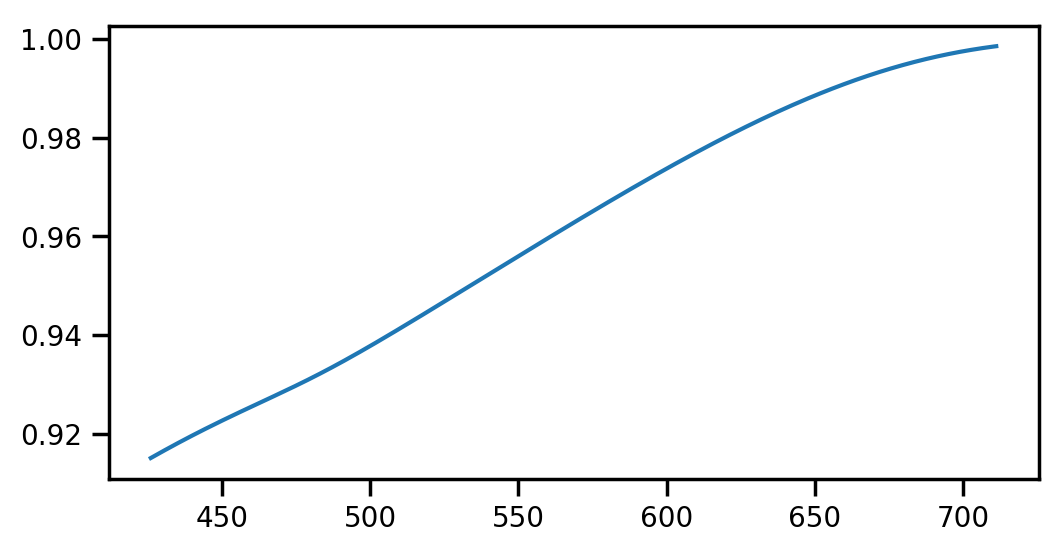

In [14]:
plt.figure(figsize=(6,3),dpi=200)
# plt.plot(U[:,40],y)
plt.plot(Rnlpse,np.flip(U[20,:]))

In [52]:
beta = 0.14071632

idx = np.where(y >= 2.0)[0][0]
# idx = np.where(y >= 0.5)[0][0]
print(f"plotting at {y[idx]}")
zmax = 48.3875
zmin = -48.3875

nz = 500
z = np.linspace(zmin, zmax, nz)
RR, ZZ = np.meshgrid(Rnlpse**2, z)

yidx = y[idx]
yidxp1 = y[idx+1]
ytarget = 2.328355402175859

U_idx = U[idx, :] + (ytarget - yidx) * (U[idx+1,:] - U[idx,:]) / (yidxp1 - yidx)

# print(yidx)
# print(yidxp1)

# print(U[idx,10])
# print(U[idx+1,10])
# print(U_idx[10])

u00_idx = u[0,0,:,idx] + (ytarget - yidx) * (u[0,0,:,idx+1] - u[0,0,:,idx])/(yidxp1-yidx)
u11_idx = u[1,1,:,idx] + (ytarget - yidx) * (u[1,1,:,idx+1] - u[1,1,:,idx])/(yidxp1-yidx)
u20_idx = u[2,0,:,idx] #+ (ytarget - yidx) * (u[2,0,:,idx+1] - u[2,0,:,idx])/(yidxp1-yidx)
# u22_idx = u[2,2,:,idx]
u31_idx = u[3,1,:,idx] + (ytarget - yidx) * (u[3,1,:,idx+1] - u[3,1,:,idx])/(yidxp1-yidx)
# u33_idx = u[3,3,:,idx]
u40_idx = u[4,0,:,idx] + (ytarget - yidx) * (u[4,0,:,idx+1] - u[4,0,:,idx])/(yidxp1-yidx)
u60_idx = u[6,0,:,idx] + (ytarget - yidx) * (u[6,0,:,idx+1] - u[6,0,:,idx])/(yidxp1-yidx)

V_idx = V[idx, :] + (ytarget - yidx) * (V[idx+1,:] - V[idx,:]) / (yidxp1 - yidx)
v00_idx = v[0,0,:,idx] + (ytarget - yidx) * (v[0,0,:,idx+1] - v[0,0,:,idx])/(yidxp1-yidx)
v11_idx = v[1,1,:,idx] + (ytarget - yidx) * (v[1,1,:,idx+1] - v[1,1,:,idx])/(yidxp1-yidx)
v20_idx = v[2,0,:,idx] + (ytarget - yidx) * (v[2,0,:,idx+1] - v[2,0,:,idx])/(yidxp1-yidx)
# v22_idx = v[2,2,:,idx]
v31_idx = v[3,1,:,idx] + (ytarget - yidx) * (v[3,1,:,idx+1] - v[3,1,:,idx])/(yidxp1-yidx)
# v33_idx = v[3,3,:,idx]
v40_idx = v[4,0,:,idx] + (ytarget - yidx) * (v[4,0,:,idx+1] - v[4,0,:,idx])/(yidxp1-yidx)
v60_idx = v[6,0,:,idx] + (ytarget - yidx) * (v[6,0,:,idx+1] - v[6,0,:,idx])/(yidxp1-yidx)

w00_idx = w[0,0,:,idx] + (ytarget - yidx) * (w[0,0,:,idx+1] - w[0,0,:,idx])/(yidxp1-yidx)
w11_idx = w[1,1,:,idx] + (ytarget - yidx) * (w[1,1,:,idx+1] - w[1,1,:,idx])/(yidxp1-yidx)
w20_idx = w[2,0,:,idx] + (ytarget - yidx) * (w[2,0,:,idx+1] - w[2,0,:,idx])/(yidxp1-yidx)
# w22_idx = w[2,2,:,idx]
w31_idx = w[3,1,:,idx] + (ytarget - yidx) * (w[3,1,:,idx+1] - w[3,1,:,idx])/(yidxp1-yidx)
# w33_idx = w[3,3,:,idx]
w40_idx = w[4,0,:,idx] + (ytarget - yidx) * (w[4,0,:,idx+1] - w[4,0,:,idx])/(yidxp1-yidx)
w60_idx = w[6,0,:,idx] + (ytarget - yidx) * (w[6,0,:,idx+1] - w[6,0,:,idx])/(yidxp1-yidx)


UU = np.zeros((nz, U.shape[1]))
VV = np.zeros((nz, U.shape[1]))
WW = np.zeros((nz, U.shape[1]))

omega = 0.026412
T = 2 * np.pi / omega
# t = 9509.5218
t = T/1.25
# t = T / 2
# t = 30

# U[idx,:] + 2 * np.real(u[2,0,:,idx] * np.exp(-1.0j * 2 * omega * t))

# for ii in range(np.size(z)):
#     UU[ii,:] = U_idx + \
#     + 2 * np.real(u11_idx * np.exp(-1.0j * omega * t + 1.0j * beta * z[ii]) + u11_idx * np.exp(-1.0j * omega * t + 1.0j * -beta * z[ii])) + \
#     + 2 * np.real(u20_idx * np.exp(-1.0j * 2 * omega * t)) + \
#     + 2 * np.real(u31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii]) + u31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii])) + \
#     + 2 * np.real(u40_idx * np.exp(-1.0j * 4 * omega * t)) + \
#     + 2 * np.real(u60_idx * np.exp(-1.0j * 6* omega * t))
#     # + np.real(u31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii])) + np.real(u31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii])) \
#     # + 2*np.real(u40_idx * np.exp(-1.0j * 4 * omega * t)) + 2*np.real(u60_idx * np.exp(-1.0j * 6 * omega * t)) 
    
#     VV[ii,:] = V_idx + \
#     + 2 * np.real(v11_idx * np.exp(-1.0j * omega * t + 1.0j * beta * z[ii]) + v11_idx * np.exp(-1.0j * omega * t + 1.0j * -beta * z[ii])) + \
#     + 2 * np.real(v20_idx * np.exp(-1.0j * 2 * omega * t)) + \
#     + 2 * np.real(v31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii]) + v31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii])) + \
#     + 2 * np.real(v40_idx * np.exp(-1.0j * 4 * omega * t)) + \
#     + 2 * np.real(v60_idx * np.exp(-1.0j * 6* omega * t))
    
#     WW[ii,:] = np.real(w00_idx) + \
#     + 2 * np.real(w11_idx * np.exp(-1.0j * omega * t + 1.0j * beta * z[ii]) + w11_idx * np.exp(-1.0j * omega * t + 1.0j * -beta * z[ii])) + \
#     + 2 * np.real(w20_idx * np.exp(-1.0j * 2 * omega * t)) + \
#     + 2 * np.real(w31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii]) + w31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii])) + \
#     + 2 * np.real(w40_idx * np.exp(-1.0j * 4 * omega * t)) + \
#     + 2 * np.real(w60_idx * np.exp(-1.0j * 6* omega * t))
    
for ii in range(np.size(z)):
    UU[ii,:] = U_idx + np.real(u11_idx * np.exp(-1.0j * omega * t + 1.0j * beta * z[ii]) + u11_idx * np.exp(-1.0j * omega * t + 1.0j * -beta * z[ii]) \
    + np.conj(u11_idx) * np.exp(-1.0j * -omega * t + 1.0j * -beta * z[ii]) + np.conj(u11_idx) * np.exp(-1.0j * -omega * t + 1.0j * beta * z[ii])) + \
    + np.real(u20_idx * np.exp(-1.0j * 2 * omega * t) + np.conj(u20_idx) * np.exp(-1.0j * 2 * -omega * t)) + \
    + np.real(u31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii]) + u31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii]) + \
    + np.conj(u31_idx) * np.exp(-1.0j * 3 * -omega * t + 1.0j * -beta * z[ii]) + np.conj(u31_idx) * np.exp(-1.0j * 3 * -omega * t + 1.0j * beta * z[ii])) + \
    + np.real(u40_idx * np.exp(-1.0j * 4 * omega * t) + np.conj(u40_idx) * np.exp(-1.0j * 4 * -omega * t)) + \
    + np.real(u60_idx * np.exp(-1.0j * 6 * omega * t) + np.conj(u60_idx) * np.exp(-1.0j * 6 * -omega * t))

    
    VV[ii,:] = V_idx + np.real(v11_idx * np.exp(-1.0j * omega * t + 1.0j * beta * z[ii]) + v11_idx * np.exp(-1.0j * omega * t + 1.0j * -beta * z[ii]) \
    + np.conj(v11_idx) * np.exp(-1.0j * -omega * t + 1.0j * -beta * z[ii]) + np.conj(v11_idx) * np.exp(-1.0j * -omega * t + 1.0j * beta * z[ii])) + \
    + np.real(v20_idx * np.exp(-1.0j * 2 * omega * t) + np.conj(v20_idx) * np.exp(-1.0j * 2 * -omega * t)) + \
    + np.real(v31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii]) + v31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii]) + \
    + np.conj(v31_idx) * np.exp(-1.0j * 3 * -omega * t + 1.0j * -beta * z[ii]) + np.conj(v31_idx) * np.exp(-1.0j * 3 * -omega * t + 1.0j * beta * z[ii])) + \
    + np.real(v40_idx * np.exp(-1.0j * 4 * omega * t) + np.conj(v40_idx) * np.exp(-1.0j * 4 * -omega * t)) + \
    + np.real(v60_idx * np.exp(-1.0j * 6 * omega * t) + np.conj(v60_idx) * np.exp(-1.0j * 6 * -omega * t))
    
    WW[ii,:] = np.real(w00_idx) + \
    + np.real(w11_idx * np.exp(-1.0j * omega * t + 1.0j * beta * z[ii]) - w11_idx * np.exp(-1.0j * omega * t + 1.0j * -beta * z[ii]) \
    + np.conj(w11_idx) * np.exp(-1.0j * -omega * t + 1.0j * -beta * z[ii]) - np.conj(w11_idx) * np.exp(-1.0j * -omega * t + 1.0j * beta * z[ii])) + \
    + np.real(w20_idx * np.exp(-1.0j * 2 * omega * t) + np.conj(w20_idx) * np.exp(-1.0j * 2 * -omega * t)) + \
    + np.real(w31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * beta * z[ii]) - w31_idx * np.exp(-1.0j * 3 * omega * t + 1.0j * -beta * z[ii]) + \
    + np.conj(w31_idx) * np.exp(-1.0j * 3 * -omega * t + 1.0j * -beta * z[ii]) - np.conj(w31_idx) * np.exp(-1.0j * 3 * -omega * t + 1.0j * beta * z[ii])) + \
    + np.real(w40_idx * np.exp(-1.0j * 4 * omega * t) + np.conj(w40_idx) * np.exp(-1.0j * 4 * -omega * t)) + \
    + np.real(w60_idx * np.exp(-1.0j * 6 * omega * t) + np.conj(w60_idx) * np.exp(-1.0j * 6 * -omega * t))


plotting at 2.1489620095178266


0.5004227499533471
0.6701194321519401
1.0628989253427712
1.0629131472451092
1.063002081599686
0.7106406676160761
0.6685095668531061
0.6701194321519401
0.7122505329149101


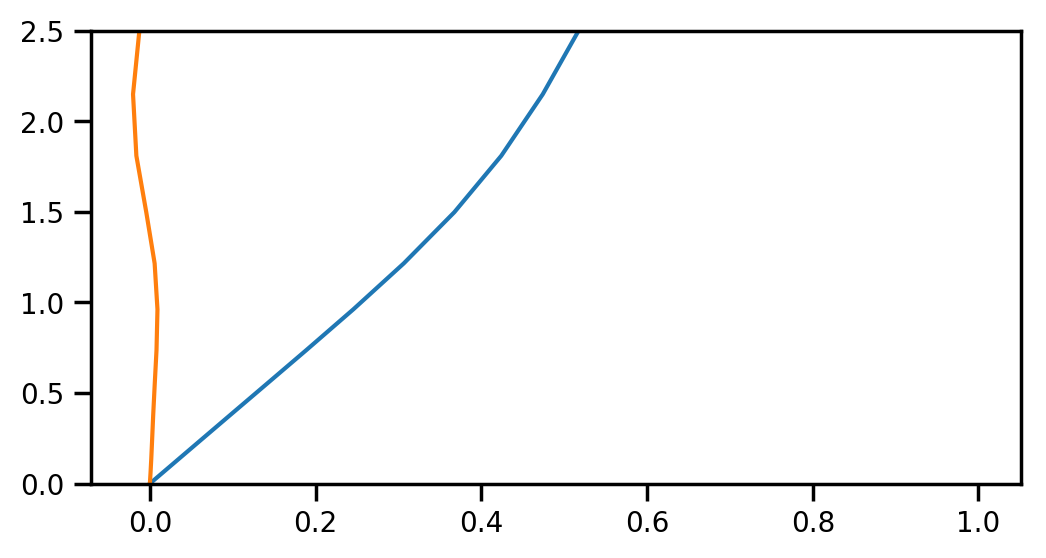

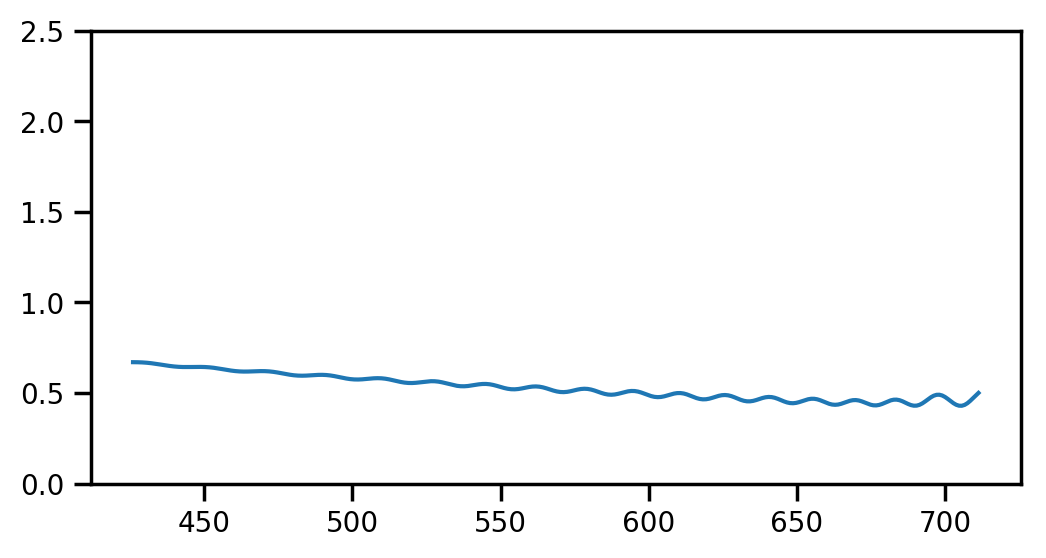

In [53]:
plt.figure(figsize=(6,3),dpi=200)
plt.plot(U[:,-1],y)
plt.plot(u[2,0,-1,:],y)
plt.ylim([0,2.5])

buf = U[idx,-1] + 2 * np.real(u[2,0,-1,idx] * np.exp(-1.0j * 2 * omega * t))

print(buf)

buf2 = U[idx,:] + 2 * np.real(u[2,0,:,idx] * np.exp(-1.0j * 2 * omega * t))
print(buf2[0])

print(UU[0,0] / buf2[0])
print(UU[0,1] / buf2[1])
print(UU[0,2] / buf2[2])

plt.figure(figsize=(6,3),dpi=200)
plt.plot(Rnlpse, buf2)
plt.ylim([0,2.5])

buf3 = U_idx + 2 * np.real(u20_idx * np.exp(-1.0j * 2 * omega * t)) 

print(U_idx[0])
print(U[idx,0])

print(buf2[0])
print(buf3[0])

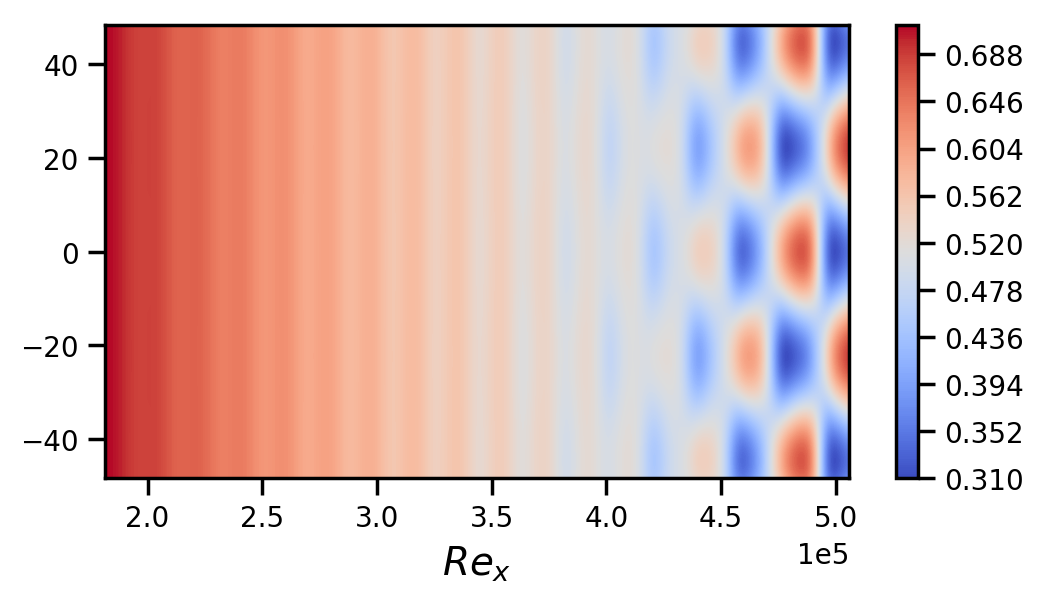

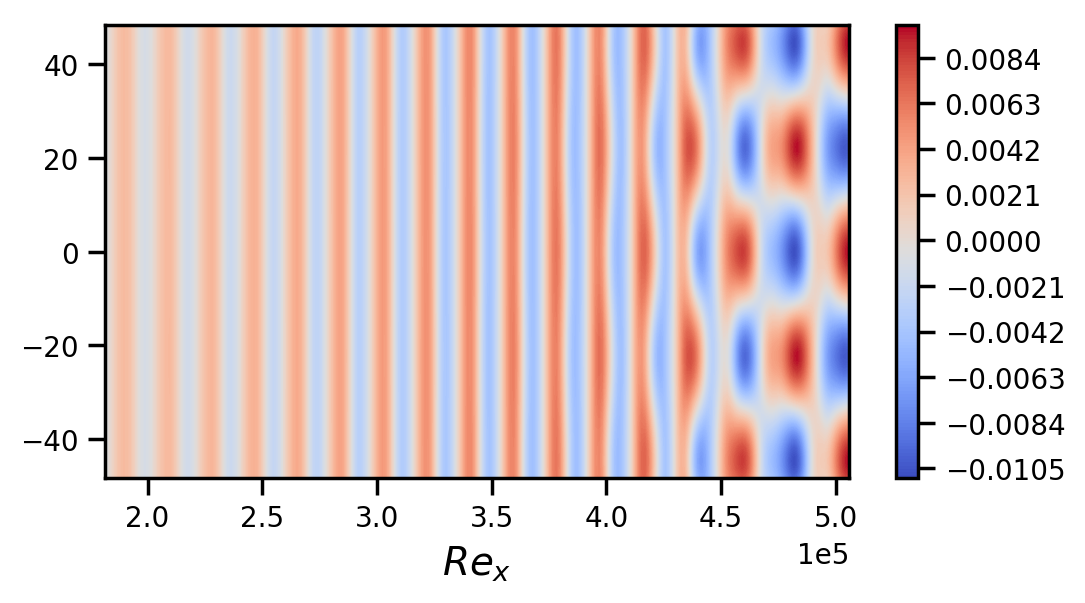

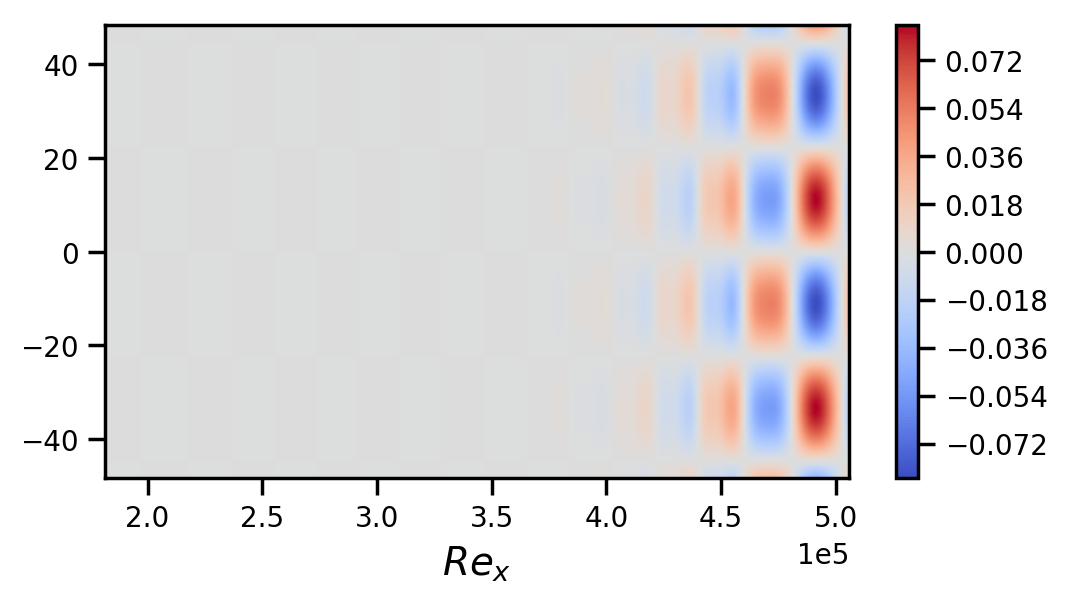

In [54]:
plt.figure(figsize=(6,3),dpi=200)
plt.contourf(RR, ZZ, UU, 200, cmap='coolwarm')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel(r'$Re_x$')
# plt.xlim([1.8e5, 5e5])
plt.colorbar()

plt.figure(figsize=(6,3),dpi=200)
plt.contourf(RR, ZZ, VV, 200, cmap='coolwarm')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel(r'$Re_x$')
plt.colorbar()

plt.figure(figsize=(6,3),dpi=200)
plt.contourf(RR, ZZ, WW, 200, cmap='coolwarm')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel(r'$Re_x$')
plt.colorbar()

# np.save('RR_nlpse.npy', RR)
# np.save('ZZ_nlpse.npy', ZZ)
# np.save('UU_nlpse.npy', UU)
# np.save('VV_nlpse.npy', VV)
# np.save('WW_nlpse.npy', WW)

In [12]:
write_profiles = 1
# profiles have standard name
# for ease, add in ability to give profiles a suffix so that they don't
# get confused later
suffix = ''

# charLES settings
Uinf = 1.0
Ma = 0.1
c = Uinf / Ma 
gamma = 1.4
rhoref = 1.0
pref = rhoref * c * c / gamma 

omega = 0.026412
beta_sh = 0.14071967213114753
beta_h1 = np.copy(beta_sh)

##### DEFINING FUNCTIONS FOR WRITING PROFILES

def writeProfile(name,x,y,z,u,v,w,rho,p):
    N = np.size(x)
    if os.path.exists('./' + name + '.prof'):
        os.remove('./' + name + '.prof')
    f = open('./' + name + '.prof', "a")
    f.write(f"( (fluentfile point {N})\n")
    writeField(f, 'x', x, N)
    writeField(f, 'y', y, N)
    writeField(f, 'z', z, N)
    writeField(f, 'x-velocity', u, N)
    writeField(f, 'y-velocity', v, N)
    writeField(f, 'z-velocity', w, N)
    writeField(f, 'absolute-pressure', p, N)
    writeField(f, 'density', rho, N)
    f.write(")")
    
def writeField(f, name, data, N):
    donezo = False
    f.write("(" + name + "\n")
    ct = 0
    looprange = int(np.ceil(N/5))
    data = data.flatten()
    for ii in range(looprange):
        for jj in range(5):
            if ct > N:
                donezo = True
                break
            else:
                writeString = f"{data[ct]:.5e}\t"
                f.write(writeString)
            ct += 1
        if donezo:
            break
        f.write('\n')
    f.write(')\n')
    
def readField(file, N):
    x = np.zeros(int(N))
    looprange = int(np.ceil(N/5))
    line = file.readline() # read header line
    for ii in range(looprange):
        line = file.readline()
        buf = line.split('\t')
        buf = buf[:-1]
        buf = [float(x) for x in buf]
        x[5*ii: 5*ii+5] = buf
    line = file.readline()
    return x
        
def readProfile(filename):
    f = open(filename, 'r')
    line = f.readline()
    N = float(line[20:-2])
    x = readField(f, N)
    y = readField(f, N)
    z = readField(f, N)
    u = readField(f, N)
    v = readField(f, N)
    w = readField(f, N)
    p = readField(f, N)
    rho = readField(f, N)
    
    return x, y, z, u, v, w, p, rho

###### END FUNCTION DEFINITIONS 

# size of the computational domain in span
Lz = 98.0 
nz = 250 # 250 is DNS resolution

z_sim = np.linspace(-Lz/2,Lz/2,nz)

[Y,Z] = np.meshgrid(y_sim,z_sim)
X = np.zeros_like(Y) # X is required to specify the inlet

ubl_write = np.zeros_like(Y)
vbl_write = np.zeros_like(Y)
wbl_write = np.zeros_like(Y)
p_write = np.ones_like(Y) * pref
rho_write = np.ones_like(Y) * rhoref

uts_write = np.zeros_like(Y)
vts_write = np.zeros_like(Y)
wts_write = np.zeros_like(Y)

uts_real_write = np.zeros_like(Y)
uts_imag_write = np.zeros_like(Y)

vts_real_write = np.zeros_like(Y)
vts_imag_write = np.zeros_like(Y)

wts_real_write = np.zeros_like(Y)
wts_imag_write = np.zeros_like(Y)

ush_write = np.zeros_like(Y)
vsh_write = np.zeros_like(Y)
wsh_write = np.zeros_like(Y)

ush_real_write = np.zeros_like(Y)
ush_imag_write = np.zeros_like(Y)

vsh_real_write = np.zeros_like(Y)
vsh_imag_write = np.zeros_like(Y)

wsh_real_write = np.zeros_like(Y)
wsh_imag_write = np.zeros_like(Y)

uh1_real_write = np.zeros_like(Y)
uh1_imag_write = np.zeros_like(Y)
vh1_real_write = np.zeros_like(Y)
vh1_imag_write = np.zeros_like(Y)
wh1_real_write = np.zeros_like(Y)
wh1_imag_write = np.zeros_like(Y)

uh2_real_write = np.zeros_like(Y)
uh2_imag_write = np.zeros_like(Y)
vh2_real_write = np.zeros_like(Y)
vh2_imag_write = np.zeros_like(Y)
wh2_real_write = np.zeros_like(Y)
wh2_imag_write = np.zeros_like(Y)

uh3_real_write = np.zeros_like(Y)
uh3_imag_write = np.zeros_like(Y)
vh3_real_write = np.zeros_like(Y)
vh3_imag_write = np.zeros_like(Y)
wh3_real_write = np.zeros_like(Y)
wh3_imag_write = np.zeros_like(Y)

# recall that that w_{m, -n} = -w_{m, n}
for ii in range(Y.shape[1]):
    for jj in range(Z.shape[0]):
        
        ubl_write[jj,ii] = ubl[ii]
        vbl_write[jj,ii] = vbl[ii]
        
        uts_real_write[jj,ii] = np.real(u_ts[ii])
        uts_imag_write[jj,ii] = np.imag(u_ts[ii])
         
        vts_real_write[jj,ii] = np.real(v_ts[ii])
        vts_imag_write[jj,ii] = np.imag(v_ts[ii])
        
        wts_real_write[jj,ii] = np.real(w_ts[ii])
        wts_imag_write[jj,ii] = np.imag(w_ts[ii])
        
        ush_real_write[jj,ii] = np.real(u_sh[ii] * np.exp(1j * beta_sh * z_sim[jj]) + u_sh[ii] * np.exp(1j * -beta_sh * z_sim[jj]))
        ush_imag_write[jj,ii] = np.imag(u_sh[ii] * np.exp(1j * beta_sh * z_sim[jj]) + u_sh[ii] * np.exp(1j * -beta_sh * z_sim[jj]))
        vsh_real_write[jj,ii] = np.real(v_sh[ii] * np.exp(1j * beta_sh * z_sim[jj]) + v_sh[ii] * np.exp(1j * -beta_sh * z_sim[jj]))
        vsh_imag_write[jj,ii] = np.imag(v_sh[ii] * np.exp(1j * beta_sh * z_sim[jj]) + v_sh[ii] * np.exp(1j * -beta_sh * z_sim[jj]))
        wsh_real_write[jj,ii] = np.real(w_sh[ii] * np.exp(1j * beta_sh * z_sim[jj]) - w_sh[ii] * np.exp(1j * -beta_sh * z_sim[jj]))
        wsh_imag_write[jj,ii] = np.imag(w_sh[ii] * np.exp(1j * beta_sh * z_sim[jj]) - w_sh[ii] * np.exp(1j * -beta_sh * z_sim[jj]))
        
        uh1_real_write[jj,ii] = np.real(u_h1[ii] * np.exp(1j * beta_h1 * z_sim[jj]) + u_h1[ii] * np.exp(1j * -beta_h1 * z_sim[jj]))
        uh1_imag_write[jj,ii] = np.imag(u_h1[ii] * np.exp(1j * beta_h1 * z_sim[jj]) + u_h1[ii] * np.exp(1j * -beta_h1 * z_sim[jj]))
        vh1_real_write[jj,ii] = np.real(v_h1[ii] * np.exp(1j * beta_h1 * z_sim[jj]) + v_h1[ii] * np.exp(1j * -beta_h1 * z_sim[jj]))
        vh1_imag_write[jj,ii] = np.imag(v_h1[ii] * np.exp(1j * beta_h1 * z_sim[jj]) + v_h1[ii] * np.exp(1j * -beta_h1 * z_sim[jj]))
        wh1_real_write[jj,ii] = np.real(w_h1[ii] * np.exp(1j * beta_h1 * z_sim[jj]) + w_h1[ii] * np.exp(1j * -beta_h1 * z_sim[jj]))
        wh1_imag_write[jj,ii] = np.imag(w_h1[ii] * np.exp(1j * beta_h1 * z_sim[jj]) + w_h1[ii] * np.exp(1j * -beta_h1 * z_sim[jj]))
        
        uh2_real_write[jj,ii] = np.real(u_h2[ii])
        uh2_imag_write[jj,ii] = np.imag(u_h2[ii])
        vh2_real_write[jj,ii] = np.real(v_h2[ii])
        vh2_imag_write[jj,ii] = np.imag(v_h2[ii])
        wh2_real_write[jj,ii] = np.real(w_h2[ii])
        wh2_imag_write[jj,ii] = np.imag(w_h2[ii])
        
        uh3_real_write[jj,ii] = np.real(u_h3[ii])
        uh3_imag_write[jj,ii] = np.imag(u_h3[ii])
        vh3_real_write[jj,ii] = np.real(v_h3[ii])
        vh3_imag_write[jj,ii] = np.imag(v_h3[ii])
        wh3_real_write[jj,ii] = np.real(w_h3[ii])
        wh3_imag_write[jj,ii] = np.imag(w_h3[ii])
        
        
        
        
##### END SETTING THE INLET ######

if write_profiles:
    writeProfile("BL_PROFILE"+suffix, X, Y, Z, ubl_write, vbl_write, wbl_write, rho_write, p_write)
    writeProfile("TS_PROFILE_REAL"+suffix,  X, Y, Z, uts_real_write, vts_real_write, wts_real_write, rho_write, p_write)
    writeProfile("SH_PROFILE_REAL"+suffix,  X, Y, Z, ush_real_write, vsh_real_write, wsh_real_write, rho_write, p_write)
    writeProfile("TS_PROFILE_IMAG"+suffix,  X, Y, Z, uts_imag_write, vts_imag_write, wts_imag_write, rho_write, p_write)
    writeProfile("SH_PROFILE_IMAG"+suffix,  X, Y, Z, ush_imag_write, vsh_imag_write, wsh_imag_write, rho_write, p_write)
    
    writeProfile("HARM1_PROFILE_REAL"+suffix,  X, Y, Z, uh1_real_write, vh1_real_write, wh1_real_write, rho_write, p_write)
    writeProfile("HARM1_PROFILE_IMAG"+suffix,  X, Y, Z, uh1_imag_write, vh1_imag_write, wh1_imag_write, rho_write, p_write)
    
    writeProfile("HARM2_PROFILE_REAL"+suffix,  X, Y, Z, uh2_real_write, vh2_real_write, wh2_real_write, rho_write, p_write)
    writeProfile("HARM2_PROFILE_IMAG"+suffix,  X, Y, Z, uh2_imag_write, vh2_imag_write, wh2_imag_write, rho_write, p_write)
    
    writeProfile("HARM3_PROFILE_REAL"+suffix,  X, Y, Z, uh3_real_write, vh3_real_write, wh3_real_write, rho_write, p_write)
    writeProfile("HARM3_PROFILE_IMAG"+suffix,  X, Y, Z, uh3_imag_write, vh3_imag_write, wh3_imag_write, rho_write, p_write)
